In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [166]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [167]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [168]:
print("Train data has {} feature  ".format(train.shape))
print("Test data has {} feature  ".format(test.shape))

Train data has (1460, 81) feature  
Test data has (1459, 80) feature  


In [169]:
train_ID= train["Id"]
test_ID= test['Id']

In [170]:
train = train.drop(['Id'], axis=1) 
test = test.drop(['Id'], axis=1) 

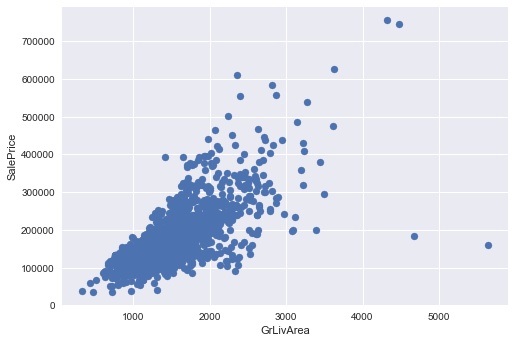

In [171]:
#outlier
fig, ax  = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [172]:
#dropping outliers
train= train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice'] < 200000)].index)

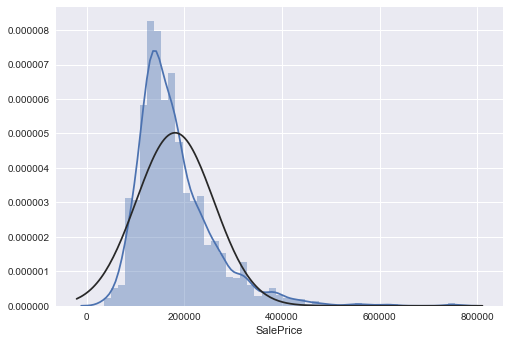

In [173]:
#sales 
sns.distplot(train['SalePrice'], fit=norm)

In [174]:
mu, sigma = norm.fit(train['SalePrice'])
print("mu {:.2f} and signma {:.2f} ".format(mu, sigma))

mu 180932.92 and signma 79467.79 


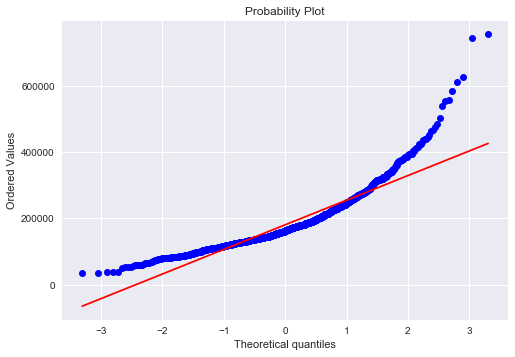

In [175]:
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Mu 12.02 and sigma 0.40


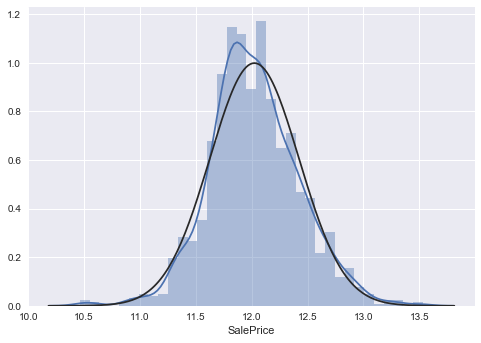

In [176]:
#Right skewed so we have to use transformation, log(1+x)
train['SalePrice']= np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'], fit=norm)
mu, sigma = norm.fit(train['SalePrice'])
print( "Mu {:.2f} and sigma {:.2f}"   .format(mu, sigma))

In [177]:
#merging train and test data 
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train.SalePrice.values

train = train.drop(['SalePrice'], axis=1)
all_data = pd.concat((train, test)).reset_index(drop=True)


In [178]:
test.shape

(1459, 79)

In [179]:
all_data.shape

(2917, 79)

In [180]:
#Missing Values
missing = (all_data.isnull().sum()/ len(all_data))*100
missing_new = missing.drop(missing[missing==0].index).sort_values(ascending= False)
missing_new = pd.DataFrame({"Missing value": missing_new})
missing_new.head()

,Missing value
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151


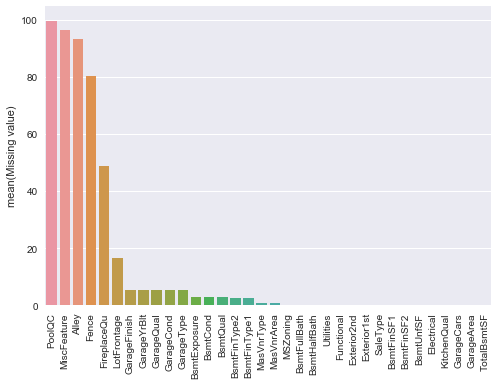

In [181]:
plt.xticks(rotation=90)
sns.barplot(x=missing_new.index, y=missing_new['Missing value'])

In [182]:
#imputation
all_data['PoolQC'] = all_data['PoolQC'].fillna('None') 
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [183]:
#filling with median
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [184]:
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[i]= all_data[i].fillna("None")
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0) 

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)    
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)    

In [185]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [186]:
all_data= all_data.drop('Utilities', axis=1)

In [187]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [188]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [189]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(all_data[c])
    all_data[c] = lbl.transform(all_data[c])
    

In [190]:
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [191]:
#additional feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [192]:
all_data.dtypes[:10]

MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street           int64
Alley            int64
LotShape         int64
LandContour     object
LotConfig       object
LandSlope        int64
dtype: object

In [193]:
#Skewed 
nume = all_data.dtypes[all_data.dtypes.apply(lambda x : x != 'object')].index
# or it can be written as
#all_data.dtypes[all_data.dtypes != 'object']
skewed_feats = all_data[nume].apply(lambda x : skew(x)).sort_values(ascending=True)
skewed_feats = pd.DataFrame({"Skewed": skewed_feats})
skewed_feats.head()

,Skewed
PoolQC,-21.217600
Street,-15.494756
Functional,-4.054126
GarageYrBlt,-3.904632
GarageCond,-3.594290


In [194]:
# Treating skewness 
skewness= skewed_feats[abs(skewed_feats)>0.75]
skewness.shape

(59, 1)

In [195]:
from scipy.special import boxcox1p

In [196]:
skewness_feture = skewness.index
lam = 0.15
for f in skewness_feture:
    all_data[f]=boxcox1p(all_data[f], lam)  

In [197]:
#Getting dummy categorical features
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [198]:
ntrain= train.shape[0]
ntest= test.shape[0]

In [213]:
train1= all_data[:ntrain]
test1=all_data[:ntest]

In [223]:
#Modelling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [306]:
#Cross validation 
n_folds= 5

def crosscv(m):
    kf= KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train1.values)
    rmse= np.sqrt(-cross_val_score(m, train1.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse



In [ ]:
train

In [271]:
#Lasso Regression 
lasso = make_pipeline(RobustScaler(), Lasso(0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#With huber loss that makes it robust to outliers
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [215]:
score= crosscv(lasso)
score.mean(), score.std()

(0.11154335005030055, 0.0073577855071339238)

In [216]:
score = crosscv(KRR)
print("Kernel Ridge score: {:.4f}, {:.4f} \n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153, 0.0075 



# Stacking models

In [41]:
#Averaging base models

In [208]:
class Average(BaseEstimator, TransformerMixin, RegressorMixin):
    
    def __init__(self, models):
        self.models= models
                
    def fit(self,x,y): 
        for model in self.models:
            model.fit(x,y)  
        return self    
    
    #Prediction and average
    def predict(self,x):
        prediction = np.column_stack([model.predict(x) for model in self.models])      
        return np.mean(prediction,axis=1)
        

In [217]:
averaged_models = Average(models = (ENet ,GBoost, KRR, lasso))
score = crosscv(averaged_models)

In [255]:
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1087 (0.0077)



# Adding a Meta-model

In [431]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    
    def __init__(self, base_models, meta_model, n_folds):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
        # Fitting data on cloned models
    def fit(self, x, y):
        self.base_models_= [list() for x in self.base_models] # It will create empty lists,for 5 models 5 empty lists 
        self.meta_model_= clone(self.meta_model)
        kfold= KFold(n_splits = self.n_folds,shuffle= True, random_state=156)
        
        out_of_fold_predictions = np.zeros((x.shape[0], len(self.base_models)))
        
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(x, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(x[train_index], y[train_index])
                y_pred = instance.predict(x[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions, y)       
        return self
    # we have predicted 5 columns using the whole data with 5 models and then feed them to meta model to predict final y  
    
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        print(meta_features)
        return self.meta_model_.predict(meta_features)
    

        

In [433]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, KRR, KRR),
                                                 meta_model = lasso, n_folds=3)

#Cross validation 
n_folds= 2

def crosscv(m):
    kf= KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train1.values)
    rmse= np.sqrt(-cross_val_score(m, train1.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse

score = crosscv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

[[ 12.22857022  12.23688664  12.23688664]
 [ 12.11484969  12.10760808  12.10760808]
 [ 12.31055619  12.3110654   12.3110654 ]
 ..., 
 [ 12.16327778  12.15445692  12.15445692]
 [ 11.96297264  11.90766619  11.90766619]
 [ 11.43518443  11.41527352  11.41527352]]
[[ 12.39755583  12.41880197  12.41880197]
 [ 12.18006848  12.21378446  12.21378446]
 [ 12.40367463  12.38951734  12.38951734]
 ..., 
 [ 12.45190681  12.39325729  12.39325729]
 [ 11.81207936  11.79971661  11.79971661]
 [ 11.90631673  11.95731414  11.95731414]]
Stacking Averaged models score: 0.1143 (0.0026)


In [434]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [437]:
stacked_averaged_models.fit(train1.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train1.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test1.values))
print(rmsle(y_train, stacked_train_pred))


[[ 12.24304989  12.244436    12.244436  ]
 [ 12.11850351  12.12114798  12.12114798]
 [ 12.29849678  12.29763725  12.29763725]
 ..., 
 [ 12.43919751  12.48832389  12.48832389]
 [ 11.84498805  11.8143362   11.8143362 ]
 [ 11.90267297  11.92684817  11.92684817]]
[[ 12.24304989  12.244436    12.244436  ]
 [ 12.11850351  12.12114798  12.12114798]
 [ 12.29849678  12.29763725  12.29763725]
 ..., 
 [ 11.84498805  11.8143362   11.8143362 ]
 [ 11.90267297  11.92684817  11.92684817]
 [ 11.67598098  11.68116249  11.68116249]]
0.0950322851314


In [438]:
stacked_pred

array([ 207377.71379885,  183174.10478924,  219026.41980624, ...,
        137697.62162726,  148748.50116611,  117777.21202068])